<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/expno5/scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Roll No:24BAD094

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("/content/breast-cancer.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(columns=['id'], inplace=True, errors='ignore')


In [5]:
features = ['radius_mean', 'texture_mean',
            'perimeter_mean', 'area_mean',
            'smoothness_mean']

X = df[features]
y = df['diagnosis']


In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Malignant = 1, Benign = 0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9298245614035088


In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



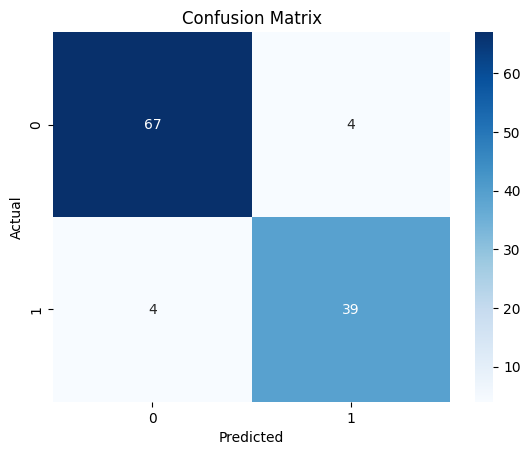

In [14]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
misclassified = X_test[y_test != y_pred]
print("Number of Misclassified Cases:", len(misclassified))


Number of Misclassified Cases: 8


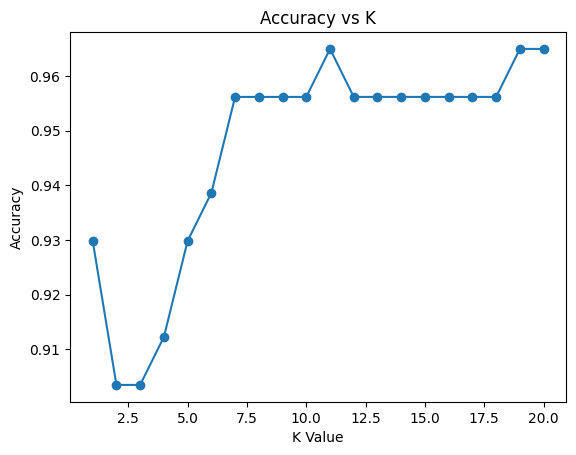

In [16]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()


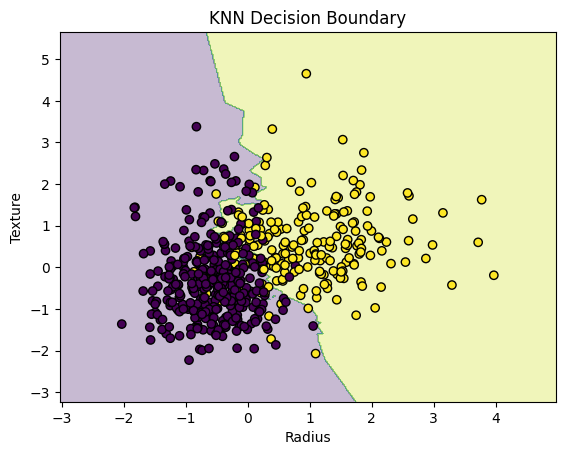

In [17]:
X_two = df[['radius_mean', 'texture_mean']]
X_two_scaled = scaler.fit_transform(X_two)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two_scaled, y_encoded, test_size=0.2, random_state=42
)

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train2, y_train2)

# Create mesh grid
x_min, x_max = X_two_scaled[:, 0].min() - 1, X_two_scaled[:, 0].max() + 1
y_min, y_max = X_two_scaled[:, 1].min() - 1, X_two_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_two_scaled[:, 0], X_two_scaled[:, 1],
            c=y_encoded, edgecolor='k')
plt.xlabel("Radius")
plt.ylabel("Texture")
plt.title("KNN Decision Boundary")
plt.show()
